In [1]:
from valurap2 import path_planning, gcode

input_fn = "diplo.gcode"
seg_no = 18

#input_fn = "box20.gcode"
#seg_no = 18

lines = gcode.reader(input_fn)
pg = gcode.path_gen(lines)
sg = gcode.gen_segments(pg)
for i, s in enumerate(sg):
    if isinstance(s, gcode.do_segment):
        print("segment", i, len(s.path))
        
    if i == seg_no:
        break
        
print(s.path)

Extruder switch to 0
do_extruder
Do Home
do_home
Set current ['E0']
Set current ['E0']
Set current ['E0']
Set current ['E0']
segment 6 663
segment 8 6
segment 10 1659
segment 12 5
segment 14 1626
segment 16 7
segment 18 2270
[[-7.895, 16.607000000000003, 0, -237.33058, 4000], [-8.207, 15.999000000000004, 75.0, -237.36468, 4001], [-8.41, 15.525000000000004, 75.0, -237.3904, 4002], [-8.651, 14.981000000000003, 75.0, -237.42008, 4003], [-8.845, 14.466000000000003, 75.0, -237.44754, 4004], [-9.113, 13.924000000000003, 75.0, -237.47771, 4005], [-9.383, 13.431000000000003, 75.0, -237.50575, 4006], [-9.565, 13.016000000000004, 75.0, -237.52836, 4007], [-9.822, 12.419000000000004, 75.0, -237.56078, 4008], [-10.009, 11.952000000000004, 75.0, -237.58588, 4009], [-10.164, 11.530000000000003, 75.0, -237.60831, 4010], [-10.343, 10.961000000000004, 75.0, -237.63807, 4011], [-10.58, 10.343000000000004, 75.0, -237.67109, 4012], [-10.835, 9.794000000000004, 75.0, -237.70129, 4013], [-10.99, 9.390000000

In [2]:
pp = path_planning.PathPlanner()
pp.accel_step = 1000
pp.max_xa = 1000
pp.max_ya = 1000
pp.set_mode("print")


path = s.path
path, slowdowns = pp.make_path(path, speed_k=1)
slowdowns, updated, cc = pp.process_corner_errors(path, slowdowns)
slowdowns, updated = pp.reverse_pass(path, slowdowns)
slowdowns, updated = pp.forward_pass(path, slowdowns)
_, updated = pp.forward_pass(path, slowdowns)

assert updated == 0



cc updated 1271
rp updated: 1247
fp updated: 633


In [3]:
all_segments = pp.gen_all_segments_pandas(path, slowdowns)
sampled = pp.sample_all_segments(all_segments)
pp.smooth_and_lin_advance(sampled)
crv, max_err = pp.curve_fit(sampled, all_segments)
print(max_err)

-1.341643108250963e-13 -23784.99905522261 -4.024929324752889e-12 -46350.25456915122 8.385269426568519e-15 -2599.578422381325
-1333.333333333334 16761.04962812559 -1333.3333333333323 16761.049628125562 93.54063756848012 -1175.8794513987164
first_curve: 1913 p=4, [-0.07  -0.07  -0.07  ... 66.881 66.881 66.881]
[[-7.89500000e+00  1.66070000e+01  0.00000000e+00]
 [-7.89281230e+00  1.66107463e+01  1.86947352e-04]
 [-7.90331325e+00  1.65927641e+01 -7.10399938e-04]
 ...
 [ 5.94788343e+00  3.36658678e+01 -1.63808652e+02]
 [ 5.59788137e+00  3.33158855e+01 -1.63784488e+02]
 [ 5.66100000e+00  3.33790000e+01 -1.63788780e+02]]
first_err: 0.10736504241334043
0.019177648475753803
-0.06999999999999995 too close to -0.06999999999999995
0.04158499999992553 too close to 0.0418581999999315
66.77604094108393
66.67177812495544
66.74151874995539
66.77638906245537
66.88099999995529 too close to 66.88099999995529
66.81125937495534 too close to 66.81124208328868
66.77638906245537 too close to 66.77636312495535


In [4]:
code = pp.format_curve_to_code(crv)

Warning, explicit X in segment
Warning, explicit X in segment
Warning, explicit X in segment
-0.06999999999999995
 -0.065  243 x: -0.00/-0.00 y:  0.00/-0.00 e:  0.00/ 0.00 a:         0         0         0 j:      0      0      0
 -0.060  243 x:  0.00/ 0.00 y:  0.00/ 0.00 e: -0.00/-0.00 a:         0         0         0 j:      0      0      0
 -0.055  244 x:  0.00/-0.00 y:  0.00/-0.00 e: -0.00/ 0.00 a:         0         0         0 j:      0      0      0
 -0.051  243 x: -0.00/ 0.00 y:  0.00/ 0.00 e:  0.00/-0.00 a:         0         1         0 j:      0      0      0
 -0.046  243 x: -0.00/-0.00 y: -0.00/-0.00 e:  0.00/ 0.00 a:        -1        -9         0 j:      0      0      0
 -0.041  243 x:  0.00/ 0.00 y:  0.00/ 0.00 e: -0.00/-0.00 a:        11        57        -1 j:      0      0      0
 -0.036  243 x:  0.00/ 0.00 y: -0.00/-0.00 e:  0.00/ 0.00 a:       -78      -327        10 j:      1      2      0
 -0.031  243 x: -0.00/-0.00 y: -0.00/-0.00 e:  0.00/ 0.00 a:      -250       345 

  2.217 2790 x:  0.02/-0.00 y: -0.01/-0.00 e: -0.01/-0.00 a:  -3058920    423940    513991 j:    122    146    -28
  2.245 1394 x:  0.00/-0.00 y: -0.02/-0.00 e: -0.01/-0.00 a:  -2751499    794979    412078 j:   2632   3570   1792
  2.273 1395 x: -0.00/ 0.00 y: -0.01/ 0.00 e: -0.01/ 0.00 a:    897584   5752848   2902207 j:    145  -2922  -1334
  2.329 2790 x: -0.01/ 0.00 y: -0.01/ 0.00 e: -0.01/-0.00 a:   1102250   1715533   1062532 j:    365     -4   -191
  2.385 2790 x: -0.01/-0.00 y: -0.02/ 0.00 e: -0.01/-0.00 a:   2120374   1712219    537981 j:   -632    333     92
  2.441 2789 x: -0.00/ 0.00 y: -0.02/-0.00 e: -0.00/ 0.00 a:    365631   2644850    801962 j:    -92   -583   -257
  2.469 1395 x: -0.01/-0.00 y: -0.01/-0.00 e:  0.01/ 0.00 a:    109919   1038500     85572 j:   2484   1403  -1564
  2.496 1395 x:  0.01/ 0.01 y: -0.01/ 0.00 e: -0.00/-0.00 a:   3579695   3024726  -2102746 j:  -5555  -1509   2848
  2.552 2789 x: -0.00/-0.01 y: -0.03/-0.00 e:  0.01/ 0.00 a:  -4167021    934709

 16.311 1116 x:  0.00/-0.00 y:  0.00/ 0.01 e: -0.00/-0.00 a:  -3195506   4298948  -2642730 j:   3846  -6228   3554
 16.355 2232 x: -0.01/ 0.00 y:  0.02/-0.00 e: -0.01/-0.00 a:   1098738  -2655636   1328137 j:    139    -85     89
 16.378 1115 x:  0.01/ 0.01 y: -0.01/-0.01 e:  0.01/ 0.00 a:   1370973  -2837383   1518278 j:  -5796   5867  -4069
 16.400 1116 x:  0.01/-0.00 y: -0.01/ 0.00 e:  0.01/-0.00 a:  -5149717   3732728  -3042416 j:   2134  -2537   1400
 16.445 2232 x:  0.03/ 0.00 y:  0.00/ 0.00 e:  0.01/ 0.00 a:  -2776333    902778  -1481861 j:   -164   -580    103
 16.489 2232 x:  0.01/-0.00 y:  0.01/ 0.00 e:  0.00/-0.00 a:  -3137946   -403947  -1248458 j:   1269   -632    659
 16.534 2231 x:  0.00/ 0.00 y:  0.02/ 0.00 e: -0.00/-0.00 a:   -331590  -1816193    211280 j:    128   -175     42
 16.578 2232 x: -0.00/-0.00 y:  0.02/ 0.00 e:  0.00/ 0.00 a:    -64072  -2211434    298809 j:    114    218    -33
 16.601 1116 x: -0.01/-0.00 y:  0.01/-0.00 e: -0.01/-0.00 a:    228698  -1763391

 29.946 1395 x: -0.01/-0.01 y: -0.01/-0.01 e:  0.00/ 0.00 a:  -2596535  -2066979   1019904 j:   3521   2884  -1612
 29.974 1395 x:  0.02/ 0.01 y:  0.02/ 0.01 e: -0.02/-0.00 a:   2291683   1936210  -1212927 j:  -7021  -6123   4274
 30.002 1395 x:  0.04/ 0.00 y:  0.05/ 0.01 e: -0.03/-0.00 a:  -7552004  -6651847   4781064 j:   -337  -3301   2076
 30.030 1395 x:  0.00/-0.01 y:  0.02/-0.01 e: -0.02/ 0.00 a:  -8099628 -11344139   7735043 j:   7327   7082  -4336
 30.058 1395 x:  0.05/ 0.02 y:  0.02/ 0.00 e:  0.02/ 0.00 a:   2090815  -1514472   1726159 j: -10793  -1704  -4932
 30.077  929 x:  0.03/-0.01 y:  0.03/ 0.01 e:  0.02/ 0.00 a: -13139824  -3979389  -5232794 j:   6322  -6513  -1041
 30.095  930 x:  0.03/ 0.00 y:  0.03/-0.00 e:  0.02/ 0.00 a:  -7436499 -10146433  -6298295 j:  -3025    679   -815
 30.114  930 x:  0.01/-0.01 y:  0.01/-0.01 e:  0.01/-0.00 a: -10335145  -9602399  -7119212 j:  11765  10753   7603
 30.132  930 x: -0.00/-0.00 y: -0.00/ 0.00 e: -0.00/-0.00 a:    591861    386389

 32.562 1240 x: -0.02/-0.01 y: -0.02/-0.01 e: -0.02/-0.00 a:  -4680808  -3974228  -3347413 j:  10576   9445   7354
 32.587 1240 x: -0.04/-0.00 y: -0.04/-0.00 e: -0.03/-0.00 a:   8479240   7784211   5804973 j:     61   2292    864
 32.612 1239 x: -0.05/-0.00 y: -0.01/ 0.01 e: -0.02/ 0.00 a:   8634537  10711009   6936310 j:   2062  -8584  -2491
 32.637 1240 x:  0.00/ 0.02 y: -0.02/-0.00 e:  0.01/ 0.00 a:  11257640    106840   3886333 j: -12939   3698  -5514
 32.662 1240 x: -0.03/-0.02 y: -0.04/-0.01 e:  0.03/ 0.00 a:  -4769690   4721130  -2945465 j:  12061   4400  -3302
 32.686 1240 x: -0.04/ 0.00 y: -0.04/ 0.00 e:  0.03/-0.00 a:  10212396  10236426  -7078845 j:  -1516  -1407    611
 32.711 1240 x:  0.00/ 0.01 y:  0.00/ 0.01 e: -0.00/-0.00 a:   8393098   8555192  -6366735 j:  -9405 -10091   7206
 32.736 1240 x:  0.04/ 0.01 y:  0.04/ 0.01 e: -0.03/-0.00 a:  -3277894  -3966038   2572308 j:  -7166  -4520   4037
 32.761 1239 x:  0.02/-0.01 y:  0.05/ 0.00 e: -0.03/ 0.00 a: -12232251  -9624918

 38.737 1240 x:  0.02/ 0.01 y: -0.00/-0.02 e:  0.01/ 0.00 a:    517267  -9610984   3162271 j:  -6159  10934  -6774
 38.762 1240 x:  0.04/ 0.00 y:  0.03/ 0.02 e:  0.03/ 0.00 a:  -7155973   3935045  -5249654 j:  -2446 -12791  -1535
 38.786 1240 x:  0.03/-0.00 y:  0.03/-0.01 e:  0.02/-0.00 a: -10256774 -11957522  -7200844 j:   3450   5054   2133
 38.811 1240 x: -0.02/-0.02 y: -0.02/-0.02 e: -0.02/-0.00 a:  -6028616  -5736757  -4589379 j:  11933  12126   8743
 38.836 1240 x: -0.05/-0.00 y: -0.04/ 0.00 e: -0.03/-0.00 a:   8811525   9346158   6283946 j:   1445   -930    972
 38.861 1239 x: -0.02/ 0.01 y:  0.00/ 0.01 e: -0.02/ 0.00 a:  10698339   8265192   7554133 j:  -7052  -9607  -3684
 38.886 1240 x: -0.01/-0.00 y: -0.04/-0.02 e:  0.01/ 0.00 a:   2000497  -3635303   3024875 j:   1229  12667  -5957
 38.910 1240 x: -0.03/-0.01 y: -0.04/ 0.00 e:  0.02/ 0.00 a:   3549026  12126735  -4367324 j:   4784  -3197  -1367
 38.935 1240 x: -0.04/ 0.00 y: -0.04/-0.00 e:  0.03/-0.00 a:   9529628   8240750

 43.151 1860 x: -0.02/ 0.01 y: -0.04/-0.01 e:  0.02/ 0.00 a:   7595671     68878   5076612 j:  -3411   4747  -5693
 43.188 1859 x: -0.05/-0.01 y: -0.06/-0.00 e:  0.04/ 0.00 a:   1295283   8950482  -5528867 j:   4856   -343   -449
 43.225 1860 x: -0.01/ 0.01 y: -0.00/ 0.01 e:  0.01/-0.00 a:  10365905   8367205  -6400813 j:  -6716  -5355   4053
 43.262 1860 x:  0.00/-0.00 y: -0.00/-0.00 e:  0.00/ 0.00 a:  -2126717  -1595438   1134684 j:   1423   1068   -758
 43.299 1860 x:  0.00/ 0.00 y: -0.00/-0.00 e: -0.00/-0.00 a:    494932    370954   -262132 j:   -272   -204    141
 43.374 3719 x:  0.01/ 0.00 y: -0.00/-0.00 e: -0.01/-0.00 a:    -17483    -10006      4213 j:    -32    -26     22
 43.423 2480 x: -0.01/-0.00 y:  0.00/ 0.00 e:  0.00/ 0.00 a:   -145330   -105300     93048 j:    368    276   -229
 43.473 2479 x:  0.07/ 0.01 y:  0.06/ 0.01 e: -0.05/-0.00 a:    774769    583581   -479470 j:  -4982  -4505   3411
 43.498 1240 x:  0.02/-0.01 y:  0.05/ 0.00 e: -0.02/ 0.00 a: -11654067 -10654178

 49.725 1394 x:  0.01/-0.00 y:  0.01/-0.01 e:  0.01/ 0.00 a:  -5703602 -11106207   4370350 j:   2771   7906  -5274
 49.753 1395 x:  0.05/ 0.01 y:  0.03/ 0.01 e:  0.04/ 0.00 a:  -1875119   -141547  -2973227 j:  -7329  -5866  -4858
 49.781 1395 x:  0.02/-0.01 y:  0.02/-0.01 e:  0.02/-0.00 a: -12149343  -8348337  -9791925 j:   7903   4441   6432
 49.808 1395 x:  0.01/ 0.00 y:  0.00/-0.00 e:  0.00/-0.00 a:  -1147552  -2169514   -840152 j:     98   1026    102
 49.836 1395 x: -0.03/-0.01 y: -0.03/-0.01 e: -0.02/-0.00 a:   -998564   -724583   -686815 j:   7135   6891   5127
 49.864 1394 x: -0.04/-0.00 y: -0.04/ 0.00 e: -0.03/ 0.00 a:   8979274   8916035   6485895 j:   -337   -303   -686
 49.892 1395 x: -0.05/-0.00 y: -0.03/ 0.00 e: -0.02/ 0.00 a:   8544297   8528703   5555348 j:   1766  -2264  -2267
 49.920 1395 x: -0.01/ 0.01 y: -0.02/ 0.00 e:  0.02/ 0.00 a:  11089095   5424191   2431397 j:  -8528  -1581  -5963
 49.939  930 x: -0.02/-0.01 y: -0.03/-0.01 e:  0.03/ 0.00 a:   -788454   3257057

 56.838 3487 x: -0.00/-0.00 y: -0.01/-0.01 e: -0.01/-0.00 a:    117974    166674    -96822 j:    -49    -65     39
 56.885 2324 x: -0.00/-0.00 y: -0.00/-0.00 e: -0.00/-0.00 a:    -29367    -31049     31023 j:     54     39    -45
 56.931 2325 x:  0.01/ 0.00 y:  0.00/ 0.00 e: -0.00/ 0.00 a:    112049     76845    -74350 j:   -290   -187    198
 56.955 1162 x:  0.03/ 0.01 y:  0.04/ 0.01 e: -0.02/-0.00 a:   -550884   -342061    371021 j:  -8515  -9980   6418
 56.978 1163 x:  0.04/-0.00 y:  0.03/-0.01 e: -0.03/ 0.00 a: -10505938 -12001586   7865766 j:    174   6600  -1344
 57.001 1162 x:  0.01/-0.01 y: -0.00/-0.01 e: -0.01/ 0.00 a: -10446736  -4430889   6398212 j:   8601   5272  -4614
 57.024 1162 x:  0.01/ 0.00 y:  0.03/ 0.02 e:  0.01/ 0.00 a:   -506481   1694715   1071419 j:  -2293 -11498  -4726
 57.048 1163 x:  0.04/ 0.01 y:  0.04/-0.00 e:  0.03/ 0.00 a:  -3176307 -11691444  -4417870 j:  -6636   2417  -2439
 57.071 1162 x:  0.03/-0.01 y:  0.03/-0.00 e:  0.02/-0.00 a: -10984797  -8994630

 64.975 1162 x:  0.00/-0.00 y:  0.00/-0.00 e: -0.00/ 0.00 a:   -860243   -809139    684130 j:    871    818   -688
 65.021 2325 x:  0.00/ 0.00 y: -0.00/-0.00 e:  0.00/ 0.00 a:    177809    168551   -135564 j:   -163   -156    119
 65.044 1162 x: -0.00/-0.00 y: -0.00/-0.00 e:  0.00/ 0.00 a:   -184256   -161777    118781 j:   1108   1042   -735
 65.068 1162 x:  0.01/ 0.01 y:  0.01/ 0.01 e: -0.01/-0.00 a:   1172156   1128659   -791656 j:  -4909  -4725   3515
 65.091 1163 x:  0.04/ 0.01 y:  0.04/ 0.01 e: -0.03/-0.00 a:  -4567663  -4394783   3318403 j:  -5619  -6318   3608
 65.114 1162 x:  0.03/-0.01 y: -0.00/-0.02 e: -0.03/ 0.00 a: -11233633 -11876714   7607285 j:   5549  14458   -951
 65.137 1162 x:  0.01/-0.00 y:  0.03/ 0.02 e:  0.00/ 0.00 a:  -4846806   4926677   6565064 j:   2135 -13561  -8550
 65.161 1163 x:  0.02/ 0.01 y:  0.04/-0.00 e:  0.02/ 0.00 a:  -2393600 -10853606  -3349068 j:  -3976   2477   -740
 65.184 1162 x:  0.04/ 0.00 y:  0.04/ 0.00 e:  0.03/ 0.00 a:  -7084178  -8083503

In [5]:
from valurap2.emulate import emulate

df_emu = emulate(code[:300], apg_states=pp.apg_states, accel_step=pp.accel_step, no_tracking=False)


11247


<IPython.core.display.Javascript object>


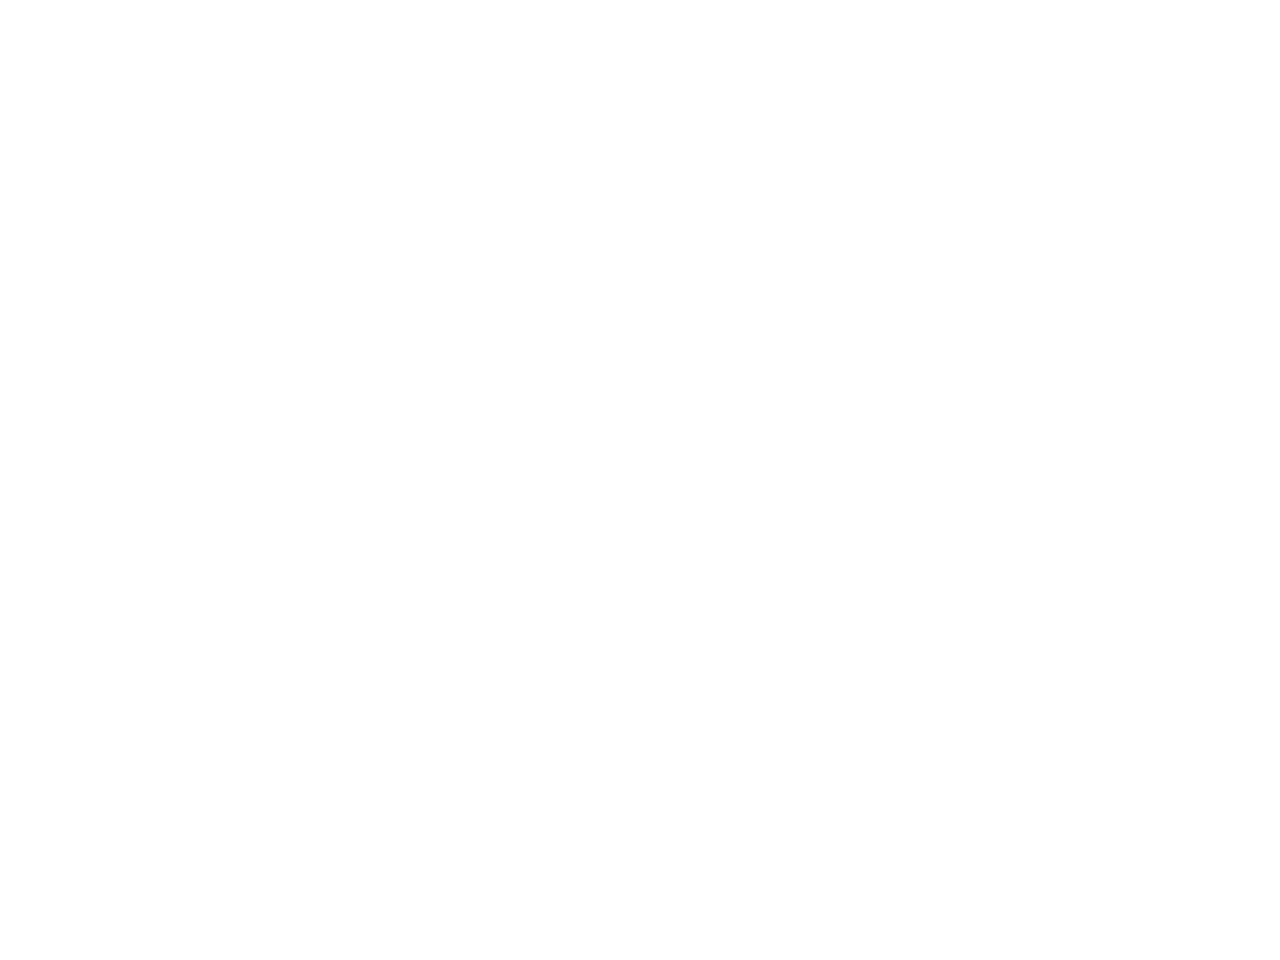

(-15.308834449618647,
 49.00777612751375,
 -16.106728355116964,
 48.20988222201543)

In [6]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import collections  as mc

%matplotlib notebook

df_emu["x_mm"] = df_emu["apg0_x"]
df_emu["y_mm"] = df_emu["apg2_x"]
df_emu["e_mm"] = df_emu["apg4_x"]
df_emu["x_steps"] = df_emu["apg0_x"] * 80
df_emu["y_steps"] = df_emu["apg2_x"] * 80
df_emu["e_steps"] = df_emu["apg4_x"] * 837
df_emu["vx_mm"] = df_emu["apg0_v"]
df_emu["vy_mm"] = df_emu["apg2_v"]
df_emu["ve_mm"] = df_emu["apg4_v"]
last_t = df_emu["t"].iloc[-1]
orig_n = int(last_t * 1000)
print(orig_n)

knots = crv.knots()[0]
res3 = crv(knots)
df2 = pd.DataFrame()
df2["kn_x"] = res3[:, 0]
df2["kn_y"] = res3[:, 1]
df2["kn_e"] = res3[:, 2]
df2["t"] = crv.knots()[0]
knots_n = np.searchsorted(knots, last_t)

#res4 = c(df_emu["t"] + knots[0])
#df_emu["c_x"] = res4[:, 0]
#df_emu["c_y"] = res4[:, 1]
#df_emu["c_e"] = res4[:, 2]

ax = df_emu.plot(x="x_mm", y="y_mm", style=".-", zorder=1)
#df_emu.plot(x="c_x", y="c_y", style=".-", zorder=2, ax=ax)
sampled[:orig_n].plot(x="x_smooth", y="y_smooth", style=".-", zorder=2, ax=ax)
df2[:knots_n].plot(x="kn_x", y="kn_y", style="*", ax=ax, zorder=3)
plt.axis("square")

In [7]:
from valurap2 import buf_commands, rest_client

cb = buf_commands.CommandBuffer(debug=False)
cb.add_segments_head(pp=pp)
cb.add_segments(code)
cb.add_segments_tail()


In [8]:
import time

if 1:
    cl = rest_client.Client(emu=False)
    cl.abort()
    time.sleep(1)
    cl.home()
    cl.wait_idle()
    cl.moveto(Y=50, X1=0)
    cl.wait_idle()
    

In [14]:
if 1:
    cl.moveto(Z=9.3+10)
    cl.wait_idle()
    cl.moveto(X1=100)
    cl.wait_idle()
    cl.move(E1=-10)
    cl.wait_idle()
    cl.moveto(X1=0, Y=50)
    cl.wait_idle()
    cl.moveto(Z=9.3+0.45)
    cl.wait_idle()

    for i in range(1):
        cl.enable(mode="print", axes="e1,e2")
        cl.exec_binary(cb.buffer)
        cl.wait_idle()
        
    cl.moveto(Z=9.3+10)
    cl.wait_idle()
    cl.moveto(X1=0, Y=-200)
    cl.wait_idle()
